<a href="https://colab.research.google.com/github/lemwaizz/PCA/blob/main/Template_PCA_Formative_1%5BPeer_Pair_5%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Formative Assignment: Advanced Linear Algebra (PCA)
This notebook will guide you through the implementation of Principal Component Analysis (PCA). Fill in the missing code and provide the required answers in the appropriate sections. You will work with the `fuel_econ.csv` dataset.

Make sure to display outputs for each code cell when submitting.

### Step 1: Load and Standardize the Data
Before applying PCA, we must standardize the dataset. Standardization ensures that all features have a mean of 0 and a standard deviation of 1, which is essential for PCA.
Fill in the code to standardize the dataset.

In [2]:
# Step 1: Load and Standardize the data (use of numpy only allowed)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


#Load the data
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv('/content/drive/MyDrive/fuel_econ.csv')
# data = pd.read_csv("fuel_econ.csv")

#selct only numerical features for standardization
numerical_features = data.select_dtypes(include = np.number).columns
numerical_data = data[numerical_features].values

#Calculate the mean and standard deviation
mean = np.mean(numerical_data, axis=0)
std_dev = np.std(numerical_data, axis=0)

#Standardize the data
standardized_numerical_data = (numerical_data - mean)/std_dev

#Replacing with standardized values
standardized_data = data.copy()
standardized_data[numerical_features] = standardized_numerical_data
print(standardized_numerical_data[:5])  # Display the first few rows of standardized data

Mounted at /content/drive
[[-1.73714048 -1.47583548  0.28310163  0.65053594  1.46709627 -1.21737766
  -0.85996012 -0.85242986 -1.29062982 -1.39247459 -1.00832279  1.02283829
  -0.95057953 -0.94575548]
 [-1.73668367 -1.47583548 -0.78181585 -0.72799833  1.86476224 -1.21737766
   0.00642675 -0.11743408  0.18494654 -0.03920038  0.07186379 -0.29854998
   0.1886082   0.1942578 ]
 [-1.73622685 -1.47583548  0.28310163  0.49736547  1.86476224 -1.21737766
  -0.69441634 -0.75324472 -0.5920197  -0.85174957 -0.68633929  0.56793413
  -0.38098566 -0.37574884]
 [-1.73577004 -1.47583548  0.28310163  0.49736547  1.86476224 -1.21737766
  -0.78280029 -0.830286   -0.82738386 -1.02758796 -0.81865124  0.752062
  -0.38098566 -0.37574884]
 [-1.73531322 -1.47583548 -0.78181585 -0.42165738 -0.62727784  0.73489021
   0.47108294  0.43314691  0.96751585  0.99253135  0.64805881 -0.72096098
   1.32779592  1.33427108]]


### Step 3: Calculate the Covariance Matrix
The covariance matrix helps us understand how the features are related to each other. It is a key component in PCA.

In [3]:
# Step 3: Calculate the Covariance Matrix
numerical_standardized_data = standardized_data.select_dtypes(include=np.number)

cov_matrix = np.cov(numerical_standardized_data, rowvar=False)  # Calculate covariance matrix
cov_matrix

array([[ 1.00025458,  0.98591866, -0.06011148, -0.07468488, -0.00657025,
        -0.02195656,  0.09182316,  0.09124849,  0.0906161 ,  0.09538375,
         0.09382686, -0.09974229, -0.1279056 , -0.12235207],
       [ 0.98591866,  1.00025458, -0.05532701, -0.07044161,  0.00623397,
        -0.03365174,  0.06806739,  0.06675938,  0.07330836,  0.07766039,
         0.07201181, -0.0811853 , -0.1498676 , -0.14517775],
       [-0.06011148, -0.05532701,  1.00025458,  0.93411019,  0.24763384,
        -0.00426546, -0.69327904, -0.66619842, -0.76646982, -0.77169964,
        -0.73821112,  0.84848979, -0.78405759, -0.78201448],
       [-0.07468488, -0.07044161,  0.93411019,  1.00025458,  0.2594021 ,
         0.02207729, -0.71366074, -0.6863403 , -0.78418374, -0.78865771,
        -0.75859024,  0.85559254, -0.7936343 , -0.79141752],
       [-0.00657025,  0.00623397,  0.24763384,  0.2594021 ,  1.00025458,
        -0.66581137, -0.27817962, -0.27261515, -0.29688365, -0.29858023,
        -0.29095711,  0.28

### Step 4: Perform Eigendecomposition
Eigendecomposition of the covariance matrix will give us the eigenvalues and eigenvectors, which are essential for PCA.
Fill in the code to compute the eigenvalues and eigenvectors of the covariance matrix.

In [4]:
# Step 4: Perform Eigendecomposition
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)  # Perform eigendecomposition
eigenvalues, eigenvectors

(array([8.95720924e+00, 2.06777956e+00, 1.59364217e+00, 6.70587666e-01,
        3.01684118e-01, 1.61017548e-01, 1.25550471e-01, 6.40205207e-02,
        3.23528963e-02, 1.36962433e-02, 9.24627112e-03, 4.24637785e-03,
        2.14358185e-03, 3.87485886e-04]),
 array([[ 1.89952516e-02, -6.87675276e-01,  7.65365183e-02,
          1.83729680e-02, -1.42115022e-02,  7.02789695e-02,
          1.14861126e-01,  4.01097554e-03, -1.15143583e-01,
         -6.95538857e-01, -6.83326435e-02,  2.10633586e-02,
         -7.10578367e-03,  6.07618642e-04],
        [ 1.24694065e-02, -6.89503292e-01,  6.88439505e-02,
         -9.43831862e-03, -1.35600088e-02,  3.37955333e-02,
          8.53170135e-02, -7.51768613e-03, -5.48830131e-02,
          7.10425085e-01,  5.58369479e-02, -9.48384475e-03,
         -3.26885432e-04, -3.98397374e-03],
        [-2.81632694e-01,  1.98550575e-02,  5.61398643e-02,
          6.00933196e-01,  9.71151716e-02, -7.09369930e-02,
          2.53817629e-01, -6.79764243e-01,  1.19688616

Confirming covariance matrix derivation

In [5]:
#confirmation of eigenvalue decomposition
Lambda = np.diag(eigenvalues)

#compute V * Lambda * V Inverse
cov_matrix_reconstructed = eigenvectors @ Lambda @ np.linalg.inv(eigenvectors)
cov_matrix_reconstructed


array([[ 1.00025458,  0.98591866, -0.06011148, -0.07468488, -0.00657025,
        -0.02195656,  0.09182316,  0.09124849,  0.0906161 ,  0.09538375,
         0.09382686, -0.09974229, -0.1279056 , -0.12235207],
       [ 0.98591866,  1.00025458, -0.05532701, -0.07044161,  0.00623397,
        -0.03365174,  0.06806739,  0.06675938,  0.07330836,  0.07766039,
         0.07201181, -0.0811853 , -0.1498676 , -0.14517775],
       [-0.06011148, -0.05532701,  1.00025458,  0.93411019,  0.24763384,
        -0.00426546, -0.69327904, -0.66619842, -0.76646982, -0.77169964,
        -0.73821112,  0.84848979, -0.78405759, -0.78201448],
       [-0.07468488, -0.07044161,  0.93411019,  1.00025458,  0.2594021 ,
         0.02207729, -0.71366074, -0.6863403 , -0.78418374, -0.78865771,
        -0.75859024,  0.85559254, -0.7936343 , -0.79141752],
       [-0.00657025,  0.00623397,  0.24763384,  0.2594021 ,  1.00025458,
        -0.66581137, -0.27817962, -0.27261515, -0.29688365, -0.29858023,
        -0.29095711,  0.28

### Step 5: Sort Principal Components
Sort the eigenvectors based on their corresponding eigenvalues in descending order. The higher the eigenvalue, the more important the eigenvector.
Complete the code to sort the eigenvectors and print the sorted components.

In [6]:
# Step 5: Sort Principal Components
sorted_indices = np.argsort(eigenvalues)  # Sort eigenvalues in descending order
sorted_eigenvectors = eigenvectors[:, sorted_indices]  # Sort eigenvectors accordingly
sorted_indices, sorted_eigenvectors

(array([13, 12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1,  0]),
 array([[ 6.07618642e-04, -7.10578367e-03,  2.10633586e-02,
         -6.83326435e-02, -6.95538857e-01, -1.15143583e-01,
          4.01097554e-03,  1.14861126e-01,  7.02789695e-02,
         -1.42115022e-02,  1.83729680e-02,  7.65365183e-02,
         -6.87675276e-01,  1.89952516e-02],
        [-3.98397374e-03, -3.26885432e-04, -9.48384475e-03,
          5.58369479e-02,  7.10425085e-01, -5.48830131e-02,
         -7.51768613e-03,  8.53170135e-02,  3.37955333e-02,
         -1.35600088e-02, -9.43831862e-03,  6.88439505e-02,
         -6.89503292e-01,  1.24694065e-02],
        [-8.90395340e-04,  8.04028190e-03,  1.60174402e-02,
          1.99493288e-02,  2.20121563e-03,  1.19688616e-01,
         -6.79764243e-01,  2.53817629e-01, -7.09369930e-02,
          9.71151716e-02,  6.00933196e-01,  5.61398643e-02,
          1.98550575e-02, -2.81632694e-01],
        [ 5.96415755e-03,  1.81240405e-02,  2.74345123e-03,
          2.64926668e-

### Step 6: Project Data onto Principal Components
Now that we’ve selected the number of components, we will project the original data onto the chosen principal components.
Fill in the code to perform the projection.

In [7]:
# Step 6: Project Data onto Principal Components
num_components = 2  # Decide on the number of principal components to keep
reduced_data = standardized_numerical_data @ sorted_eigenvectors[:, :num_components]  # Project data onto the principal components
reduced_data[:5]

array([[ 1.65020379e-02, -2.07315088e-03],
       [ 7.40927248e-05,  4.73914564e-03],
       [-5.77382010e-03, -3.35740061e-02],
       [-4.01191167e-03, -2.22520501e-02],
       [-6.69787162e-03,  4.04150388e-03]])

### Step 7: Output the Reduced Data
Finally, display the reduced data obtained by projecting the original dataset onto the selected principal components.

In [8]:
# Step 7: Output the Reduced Data
print(f'Reduced Data Shape: {reduced_data.shape}')  # Display reduced data shape
reduced_data[:5]  # Display the first few rows of reduced data

Reduced Data Shape: (3929, 2)


array([[ 1.65020379e-02, -2.07315088e-03],
       [ 7.40927248e-05,  4.73914564e-03],
       [-5.77382010e-03, -3.35740061e-02],
       [-4.01191167e-03, -2.22520501e-02],
       [-6.69787162e-03,  4.04150388e-03]])

### Step 8: Visualize Before and After PCA
Now, let's plot the original data and the data after PCA to compare the reduction in dimensions visually.

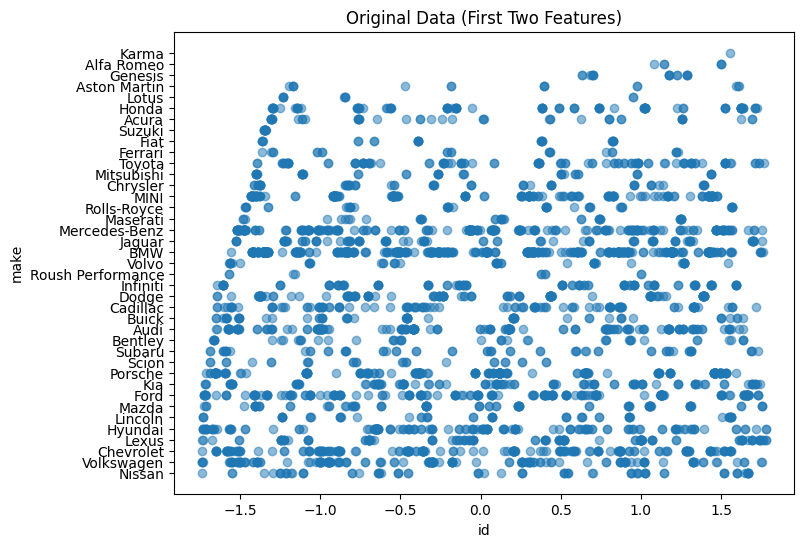

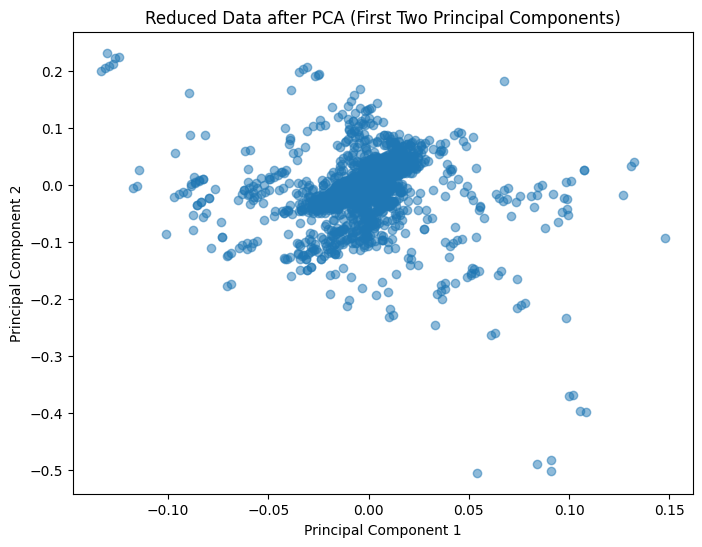

In [9]:
# Step 8: Visualize Before and After PCA

# Plot original data (first two features for simplicity)

plt.figure(figsize=(8, 6))
plt.scatter(standardized_data.iloc[:, 0], standardized_data.iloc[:, 1], alpha=0.5)
plt.title('Original Data (First Two Features)')
plt.xlabel(standardized_data.columns[0])
plt.ylabel(standardized_data.columns[1])
plt.show()
# Plot reduced data after PCA
plt.figure(figsize=(8, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], alpha=0.5)
plt.title('Reduced Data after PCA (First Two Principal Components)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()
